In [95]:
import pandas as pd
import numpy as np
df = pd.read_csv('../data/clean/cleaned_data_main.csv')

In [96]:
df_delivered = df[df["order_status"] == "delivered"].copy()

In [97]:
df_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,seller_id,price,...,payment_id,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,1,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,...,2,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,...,3,1,credit_card,4,249.25,construction_tools_garden,2200.0,16.0,16.0,16.0
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,639iGvMyv0De,jWzS0ayv9TGf,264.50,...,4,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,1lycYGcsic2F,l1pYW6GBnPMr,779.90,...,5,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89302,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,W8vikEizUggJ,2QjevWskirjm,31.99,...,89312,1,wallet,1,128.00,toys,700.0,21.0,14.0,14.0
89303,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,...,89313,1,wallet,1,106.86,toys,600.0,16.0,16.0,16.0
89304,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,EG4wDSpFyTth,TuPm19CMKvrM,58.10,...,89314,1,credit_card,1,376.39,health_beauty,250.0,22.0,10.0,18.0
89305,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,...,89315,1,voucher,1,48.05,toys,250.0,16.0,2.0,11.0


In [98]:
#H3: Delivery speed differs across customer states.
df_delivered.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date', 'product_id', 'seller_id', 'price',
       'shipping_charges', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_category_name',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm'],
      dtype='object')

In [99]:
#creating a new data frame with only the important columns for this analysis
delivery_states_df = df_delivered[['order_purchase_timestamp','order_delivered_timestamp','customer_city','customer_state']]

In [100]:
display(delivery_states_df)

,order_purchase_timestamp,order_delivered_timestamp,customer_city,customer_state
0,2017-10-22 18:57:54,2017-10-26 22:19:52,varzea paulista,SP
1,2018-06-20 21:40:31,2018-07-03 22:51:22,armacao dos buzios,RJ
2,2018-02-16 16:19:31,2018-02-27 01:29:50,jandira,SP
3,2018-08-18 18:04:29,2018-08-27 20:03:51,uberlandia,MG
4,2017-12-22 16:44:04,2018-01-05 19:22:49,ilhabela,SP
...,...,...,...,...
89302,2018-08-19 17:25:36,2018-08-30 14:47:46,amparo,SP
89303,2017-12-15 11:20:27,2017-12-20 19:23:40,itapevi,SP
89304,2018-07-24 06:39:14,2018-07-27 01:41:40,sao paulo,SP
89305,2018-08-11 08:04:22,2018-08-14 21:43:51,paulinia,SP


In [101]:
#checking the difference between the purchase timestamp and the delivery timestamp
delivery_states_df['order_purchase_timestamp'] = pd.to_datetime(df_delivered['order_purchase_timestamp'])
delivery_states_df['order_delivered_timestamp'] = pd.to_datetime(df_delivered['order_delivered_timestamp'])

delivery_time = delivery_states_df['order_delivered_timestamp'] - delivery_states_df['order_purchase_timestamp']

C:\Users\Alexandra\AppData\Local\Temp\ipykernel_14040\345737726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_states_df['order_purchase_timestamp'] = pd.to_datetime(df_delivered['order_purchase_timestamp'])
C:\Users\Alexandra\AppData\Local\Temp\ipykernel_14040\345737726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_states_df['order_delivered_timestamp'] = pd.to_datetime(df_delivered['order_delivered_timestamp'])


In [102]:
#creating a new column for the delivery time
delivery_states_df['delivery_time'] = delivery_time

C:\Users\Alexandra\AppData\Local\Temp\ipykernel_14040\3277580052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_states_df['delivery_time'] = delivery_time


In [103]:
#checking the results of the column delivery_time
delivery_states_df

,order_purchase_timestamp,order_delivered_timestamp,customer_city,customer_state,delivery_time
0,2017-10-22 18:57:54,2017-10-26 22:19:52,varzea paulista,SP,4 days 03:21:58
1,2018-06-20 21:40:31,2018-07-03 22:51:22,armacao dos buzios,RJ,13 days 01:10:51
2,2018-02-16 16:19:31,2018-02-27 01:29:50,jandira,SP,10 days 09:10:19
3,2018-08-18 18:04:29,2018-08-27 20:03:51,uberlandia,MG,9 days 01:59:22
4,2017-12-22 16:44:04,2018-01-05 19:22:49,ilhabela,SP,14 days 02:38:45
...,...,...,...,...,...
89302,2018-08-19 17:25:36,2018-08-30 14:47:46,amparo,SP,10 days 21:22:10
89303,2017-12-15 11:20:27,2017-12-20 19:23:40,itapevi,SP,5 days 08:03:13
89304,2018-07-24 06:39:14,2018-07-27 01:41:40,sao paulo,SP,2 days 19:02:26
89305,2018-08-11 08:04:22,2018-08-14 21:43:51,paulinia,SP,3 days 13:39:29


In [104]:
delivery_states_df['delivery_time'] = delivery_states_df['delivery_time'].dt.total_seconds() / (24*3600)

C:\Users\Alexandra\AppData\Local\Temp\ipykernel_14040\3395616600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_states_df['delivery_time'] = delivery_states_df['delivery_time'].dt.total_seconds() / (24*3600)


In [105]:
#checking the average delivery time per states 
avg_delivery_state = (delivery_states_df.groupby('customer_state')['delivery_time'].mean().reset_index().sort_values('delivery_time', ascending=True))
display(avg_delivery_state)


,customer_state,delivery_time
25,SP,8.695426
10,MG,11.970323
17,PR,12.055294
6,DF,12.840368
23,SC,14.968185
22,RS,15.036946
8,GO,15.181051
18,RJ,15.208755
11,MS,15.540226
7,ES,15.567490


In [106]:
avg_delivery_state = (
    delivery_states_df
    .groupby('customer_state')
    .agg(
        average_delivery_time=('delivery_time', 'mean'),
        std_delivery_time=('delivery_time', 'std')
    )
    .reset_index()
    .sort_values('average_delivery_time', ascending=True)
)

In [107]:
display(avg_delivery_state)

,customer_state,average_delivery_time,std_delivery_time
25,SP,8.695426,6.465950
10,MG,11.970323,7.114132
17,PR,12.055294,7.133555
6,DF,12.840368,7.000621
23,SC,14.968185,8.923994
22,RS,15.036946,9.003633
8,GO,15.181051,8.217106
18,RJ,15.208755,11.316127
11,MS,15.540226,7.616726
7,ES,15.567490,10.437786


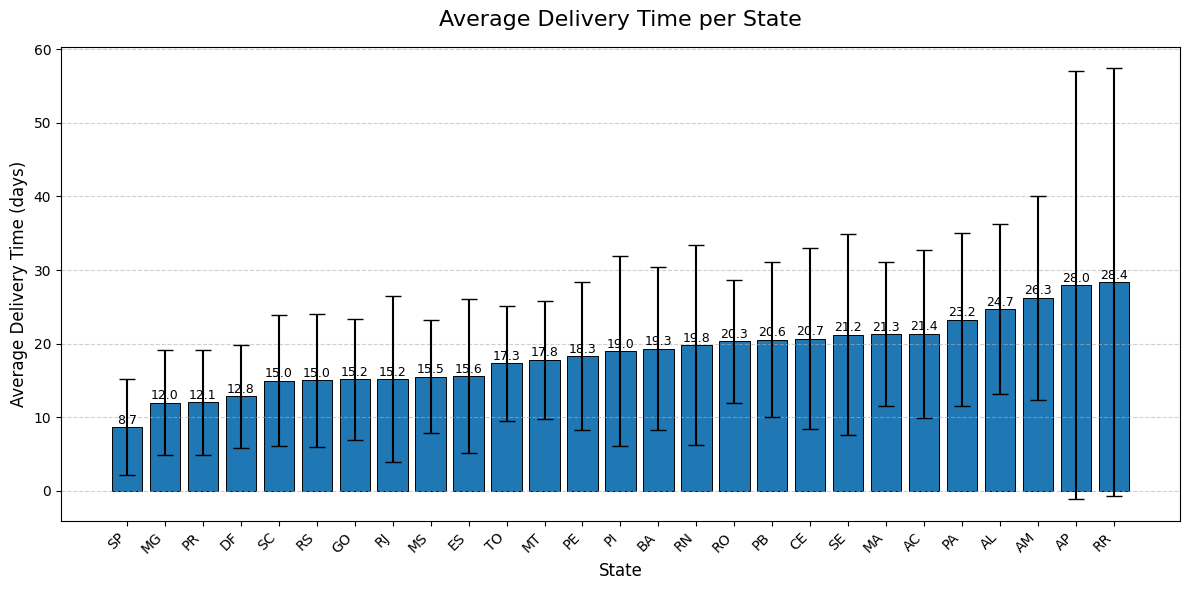

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Sort states by average delivery time for a nicer visual flow
df_plot = avg_delivery_state.sort_values("average_delivery_time")

plt.figure(figsize=(12, 6))

plt.bar(
    df_plot["customer_state"],
    df_plot["average_delivery_time"],
    yerr=df_plot["std_delivery_time"],
    capsize=6,
    linewidth=0.7,
    edgecolor="black",
)

# Title & labels
plt.title("Average Delivery Time per State", fontsize=16, pad=15)
plt.xlabel("State", fontsize=12)
plt.ylabel("Average Delivery Time (days)", fontsize=12)

# Rotate labels to avoid overlap
plt.xticks(rotation=45, ha="right", fontsize=10)

# Light horizontal grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Add value labels on each bar
for x, y in zip(df_plot["customer_state"], df_plot["average_delivery_time"]):
    plt.text(x, y + 0.05, f"{y:.1f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

# plt.savefig(
#     "../figures/avg_delivery_time_state.png",
#     dpi=300,
#     bbox_inches="tight",
#     transparent=True
# )

In [109]:
#checking the minimum delivery time per states
min_delivery_state = (delivery_states_df.groupby('customer_state')['delivery_time'].min().reset_index().sort_values('delivery_time', ascending=True))
display(min_delivery_state)


,customer_state,delivery_time
18,RJ,0.533414
25,SP,0.781366
4,BA,0.863426
10,MG,1.053900
17,PR,1.087870
6,DF,1.266678
8,GO,1.298449
22,RS,1.307894
19,RN,1.421829
23,SC,1.541898


In [110]:
#checking the max delivery time per states
max_delivery_state = (delivery_states_df.groupby('customer_state')['delivery_time'].max().reset_index().sort_values('delivery_time', ascending=True))
display(max_delivery_state)

,customer_state,delivery_time
20,RO,50.779942
26,TO,58.010544
11,MS,58.872766
6,DF,68.621146
9,MA,70.839317
0,AC,72.198310
12,MT,79.549306
15,PE,89.996424
1,AL,90.960995
17,PR,97.468507


In [111]:
# Mapping Brazilian state codes to full names
state_map = {
    'AC':'Acre', 'AL':'Alagoas', 'AP':'Amapá', 'AM':'Amazonas', 'BA':'Bahia',
    'CE':'Ceará', 'DF':'Distrito Federal', 'ES':'Espírito Santo', 'GO':'Goiás',
    'MA':'Maranhão', 'MT':'Mato Grosso', 'MS':'Mato Grosso do Sul', 'MG':'Minas Gerais',
    'PA':'Pará', 'PB':'Paraíba', 'PR':'Paraná', 'PE':'Pernambuco', 'PI':'Piauí',
    'RJ':'Rio de Janeiro', 'RN':'Rio Grande do Norte', 'RS':'Rio Grande do Sul',
    'RO':'Rondônia', 'RR':'Roraima', 'SC':'Santa Catarina', 'SP':'São Paulo',
    'SE':'Sergipe', 'TO':'Tocantins'
}

avg_delivery_state['state_name'] = avg_delivery_state['customer_state'].map(state_map)


In [112]:
avg_delivery_state

,customer_state,average_delivery_time,std_delivery_time,state_name
25,SP,8.695426,6.465950,São Paulo
10,MG,11.970323,7.114132,Minas Gerais
17,PR,12.055294,7.133555,Paraná
6,DF,12.840368,7.000621,Distrito Federal
23,SC,14.968185,8.923994,Santa Catarina
22,RS,15.036946,9.003633,Rio Grande do Sul
8,GO,15.181051,8.217106,Goiás
18,RJ,15.208755,11.316127,Rio de Janeiro
11,MS,15.540226,7.616726,Mato Grosso do Sul
7,ES,15.567490,10.437786,Espírito Santo


<Figure size 1200x1200 with 0 Axes>

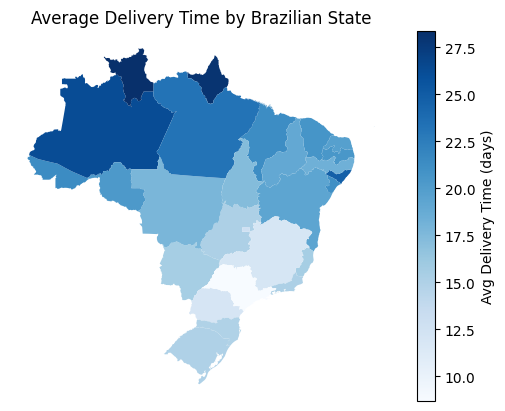

<Figure size 640x480 with 0 Axes>

In [ ]:
import geopandas as gpd

url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
brazil = gpd.read_file(url)
import matplotlib.pyplot as plt

# Load Brazil states GeoJSON
#brazil = gpd.read_file('brazil_states.geojson')  # make sure you have this file

# Merge with delivery data
merged = brazil.merge(avg_delivery_state, left_on='name', right_on='state_name', how='left')

# Plot choropleth
plt.figure(figsize=(12,12))
merged.plot(column='average_delivery_time', cmap='Blues', legend=True,
            legend_kwds={'label': "Avg Delivery Time (days)"},
            missing_kwds={"color": "lightgrey"})
plt.title('Average Delivery Time by Brazilian State')
plt.axis('off')
plt.show()




In [114]:
#pip install geopandas matplotlib
